# Machine Learning for Heart Disease Prediction

## Import Libraries

In [59]:
# Import needed libraries

import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from plotly.offline import iplot
from sklearn.model_selection import train_test_split




## 1. Data Collection and Preparation

In [60]:
# Load the UCI Machine Learning Repository Dataset


data_url = "https://github.com/mjt1400/M3SummativeExam_TAN/raw/main/UCIdataset.csv"
df = pd.read_csv(data_url)


The Data was acquired from [Heart Disease dataset from the Cleveland Clinic Foundation AKA UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/statlog+(heart))

In [61]:
df.shape

(270, 14)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [63]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [64]:
#Check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [65]:
df['target'].value_counts()

1    150
2    120
Name: target, dtype: int64

In [66]:
# Percentage of patients have and do not have heart disease
df['target'].value_counts()/df.shape[0]*100 

1    55.555556
2    44.444444
Name: target, dtype: float64

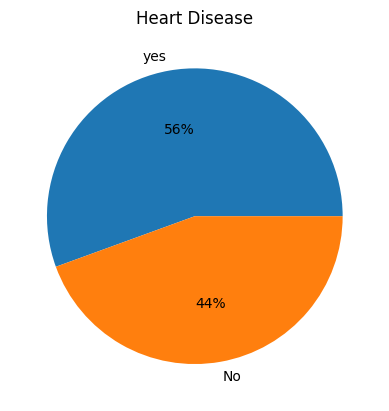

In [67]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()


In [68]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(df[df['target'] == 1]['age']))
print('Max age of people who do not have heart disease: ', max(df[df['target'] == 1]['age']))
print('Average age of people who do not have heart disease: ', df[df['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.70666666666666


In [69]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(df[df['target'] == 2]['age']))
print('Max age of people who have heart disease: ', max(df[df['target'] == 2]['age']))
print('Average age of people who have heart disease: ', df[df['target'] == 2]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.59166666666667


### Males and Females in the Dataset


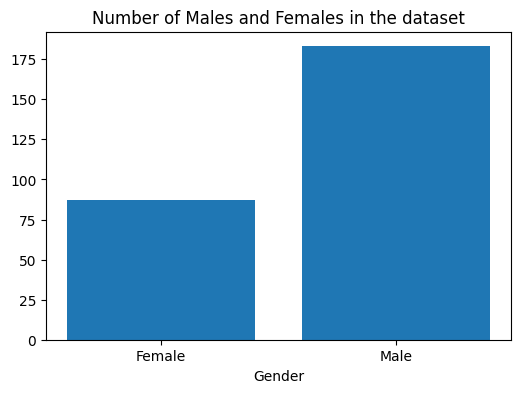

In [70]:
# Number of males and females
F = df[df['sex'] == 0].count()['target']
M = df[df['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

## 3. Modeling

### Building the Model, Model Evaluation, and Hyperparameter Tuning.

In [71]:
from sklearn.model_selection import GridSearchCV

# Splitting the data into features (X) and the target variable (y)
X = df.drop(columns=['target'])  # Extracting the features by dropping the 'target' column
y = df['target']  # Extracting the target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a dictionary that will hold the performance metrics for each model.
model_metrics = {}

# Models with parameter grids for tuning
models = {
    "Logistic Regression": (LogisticRegression(random_state=42), {}),
    "Random Forest": (RandomForestClassifier(random_state=42), {'n_estimators': [100, 200, 300]}),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {}),
    "SVM": (SVC(random_state=42), {'C': [0.1, 1, 10]}),
    "Neural Network": (MLPClassifier(random_state=42), {'hidden_layer_sizes': [(50,), (100,), (200,)]})
}

for model_name, (model, param_grid) in models.items():
    # Perform parameter tuning and cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5)  # Use 5-fold cross-validation
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model with optimized parameters
    best_model = grid_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate performance metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store the metrics and confusion matrix in the dictionary
    model_metrics[model_name] = {
        "Metrics": metrics,
        "Confusion Matrix": cm
    }

# Find the model with the highest accuracy
best_model_name = max(model_metrics, key=lambda x: model_metrics[x]["Metrics"]["Accuracy"])

# Print the performance metrics and confusion matrix for each model
for model, metrics in model_metrics.items():
    print(f"{model}:")
    print(f"Accuracy: {metrics['Metrics']['Accuracy']}")
    print(f"Precision: {metrics['Metrics']['Precision']}")
    print(f"Recall: {metrics['Metrics']['Recall']}")
    print(f"F1 Score: {metrics['Metrics']['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print()

# Save the best model to a file in pkl format
model_filename = "model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(models[best_model_name][0], file)

print("Best Model:", best_model_name)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum

Logistic Regression:
Accuracy: 0.9074074074074074
Precision: 0.9117647058823529
Recall: 0.9393939393939394
F1 Score: 0.9253731343283583
Confusion Matrix:
[[31  2]
 [ 3 18]]

Random Forest:
Accuracy: 0.8703703703703703
Precision: 0.8611111111111112
Recall: 0.9393939393939394
F1 Score: 0.8985507246376813
Confusion Matrix:
[[31  2]
 [ 5 16]]

Decision Tree:
Accuracy: 0.6851851851851852
Precision: 0.7857142857142857
Recall: 0.6666666666666666
F1 Score: 0.721311475409836
Confusion Matrix:
[[22 11]
 [ 6 15]]

SVM:
Accuracy: 0.8888888888888888
Precision: 0.8857142857142857
Recall: 0.9393939393939394
F1 Score: 0.9117647058823529
Confusion Matrix:
[[31  2]
 [ 4 17]]

Neural Network:
Accuracy: 0.8888888888888888
Precision: 0.8857142857142857
Recall: 0.9393939393939394
F1 Score: 0.9117647058823529
Confusion Matrix:
[[31  2]
 [ 4 17]]

Best Model: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

